# HOMEWORK - 5

##### Teams -  Shubham Bipin Kumar 
##### This work is solely done by me.

# Problem 1: Pattern-matching: The brute-force

In [ ]:
QUESTION - 1.1

In [6]:
def bruteForce(text, pattern):
    n = len(text)
    m = len(pattern)

    for i in range(n-m+1):
        k=0
        while k < m and text[i+k] == pattern[k]:
            k += 1
        if k == m:
            return i
    return -1



if __name__ == "__main__":
    D = "AAAAAAAAAAAAAAAAAAAB"
    P = "AAAAA"
    #D = "abcdjbasbdabdhjavsd"
    #P = "javsd"
    print("pattern found at :", bruteForce(D,P))

pattern found at : 14


In [ ]:
# The above case takes omega(db) time as the oterloop which runs till (d-p+1) times as in it looks for the first index of the pattern and seaches in the text unitil it gets for  in
#     once the first elemnt of the pattern is found the inner loop starts which which matches rest of the elemnts of pattern with next values of the text . I the above text and pattern selected above
# the outer loop will run till (d-p+1) and the inner loop will run evrytime for p count as the all the elements are same . so over all time complexity is (d-p+1)p can be stated as omega(dp)
#

# QUESTION - 1.2 (1) - BRUTE-FORCE-NON-OVERLAP

In [2]:
def bruteForce(text, pattern):
    n = len(text)
    m = len(pattern)
    i = 0
    non_overlapping_list =[]
    while i < n-m+1:
        #print(j)
        k = 0
        #print("i at the begining", i)
        while k < m and text[i+k] == pattern[k]:
            k += 1
        if k == m:
            #print("i before addition:", i)
            non_overlapping_list.append(i)
            i += m
            #print("i after addition:", i)
        i += 1

    if (len(non_overlapping_list) > 0):
        return non_overlapping_list
    else:
        return -1



if __name__ == "__main__":
    D = "AcdcdcAAAAAcdcdcAAAAAcdcAAB"
    P = "cdc"
    #P = "xyzbv"
    val = bruteForce(D, P)
    if (val == -1):
        print("pattern not found in the text")
    else:
        print("pattern found at :", val)





pattern found at : [1, 11, 21]


# QUESTION - 1.2 (2) - BOYERMORE-NON-OVERLAP

In [3]:
def find_boyer_moore(T, p):
    n, m = len(T), len(p)
    if m == 0:
        return 0

    last = {}
    non_overlapping_list = []

    for k in range(m):
        last[p[k]] = k
    i = m - 1
    k = m - 1
    while i < n :
        #If match , decrease i, k
        if T[i] == p[k]:
            if k == 0:
                non_overlapping_list.append(i)
                i = i + 2 * m
                k = m - 1
            else:
                i -= 1
                k -= 1
        #Not match , reset the positions
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1

    if (len(non_overlapping_list) > 0):
        return non_overlapping_list
    else:
        return -1

if __name__ == "__main__":
    D = "AcdcdcAAAAAcdcdcAAAAAcdcAAB"
    P = "cdc"
    #P = "xyzbv"
    val = find_boyer_moore(D,P)
    if (val == -1):
        print("pattern not found in the text")
    else:
        print("pattern found at :", val)




pattern found at : [1, 11, 21]


# QUESTION - 1.2 (2) - KMP-NON-OVERLAP

In [4]:
# KMP failure function
def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k + 1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k - 1]
        else:
            j += 1
    return fail


#KMP

def find_kmp(T, P):
    n, m = len(T), len(P)
    non_overlapping_list = []
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    #print (fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                non_overlapping_list.append(j-m+1)
                j += 1
                k = 0
                continue
                #return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k - 1]
        else:
            j += 1

    if (len(non_overlapping_list) > 0):
        return non_overlapping_list
    else:
        return -1


if __name__ == "__main__":
    D = "AcdcdcAAAAAcdcdcAAAAAcdcAAB"
    P = "cdc"
    #P = "xyzbv"
    val = find_kmp(D,P)
    if (val == -1):
        print("pattern not found in the text")
    else:
        print("pattern found at :", val)

pattern found at : [1, 11, 21]


# Problem 2: Experimental Analysis of Pattern-Matching Algorithms

In [8]:
# Problem 2.1
import random
%matplotlib inline
import matplotlib.pyplot as plot

# Brute Force
def find_brute (T , P ) :
    #Number of comparisions
    comparisons = 0
    n , m = len(T), len(P)
    # every starting position
    for i in range (n-m+1) :
        k = 0
        # conduct O(k) comparisons
        comp_res = T[i+k] == P[k]
        comparisons += 1
        while k < m and comp_res:
            k += 1
            if k == m :
                return i, comparisons
            comp_res = T[i+k] == P[k]
            comparisons += 1
    return -1, comparisons

In [9]:
# KMP failure function
def compute_kmp_fail(P):
    #Number of comparisions
    comparisons = 0
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m :
        comparisons += 1
        if P [j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail [k-1]
        else :
            j += 1
    return fail, comparisons



In [10]:
# KMP
def find_kmp(T, P) :
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail, comparisons = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    while j < n :
        comparisons += 1
        if T[j] == P[k]:
            if k == m-1:
                return j-m+1, comparisons
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else :
            j += 1
    return -1, comparisons



In [11]:
# Boyer-Moore
def find_boyer_moore (T, P) :
    comparisions = 0
    n ,m = len(T), len(P)
    if m == 0:
        return 0
    last = {}
    for k in range(m) :
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n :
        comparisions += 1
        # If match , decrease i,k
        if T[i] == P[k]:
            if k == 0:
                return i, comparisions
            else :
                i -= 1
                k -= 1
        # Not match , reset the positions
        else :
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return -1, comparisions

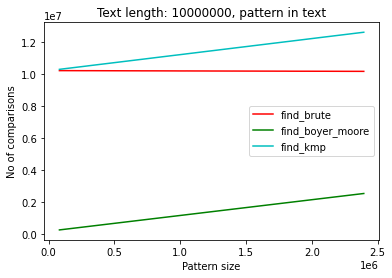

In [12]:
def line_color(A):
    if A == find_brute.__name__:
        return 'r'
    elif A == find_boyer_moore.__name__:
        return 'g'
    else:
        return 'c'

long_text = []
alphabet_case_bases = [96, 65]
text_len = 10 ** 7
for i in range(text_len):
    alphabet_case = random.sample(alphabet_case_bases, 1)[0]
    long_text.append(chr(random.randint(alphabet_case, alphabet_case + 25)))
long_text = ''.join(long_text)
algo_name_to_data = {}


fig, axes = plot.subplots()

# For pattern in text
for A in [find_brute, find_boyer_moore, find_kmp]:
    algo_name_to_data[A.__name__] = {}

for pattern_size in random.sample(range(1, text_len // 4), 50): 
    pattern_location = text_len - pattern_size - 1
    pattern = long_text[pattern_location: pattern_location + pattern_size]
    for A in [find_brute, find_boyer_moore, find_kmp]:
        _, no_of_comparisons = A(long_text, pattern)
        algo_name_to_data[A.__name__][pattern_size] = no_of_comparisons

for A in [find_brute, find_boyer_moore, find_kmp]:
    algo_name_to_data[A.__name__] = {key : algo_name_to_data[A.__name__][key] for key in sorted(algo_name_to_data[A.__name__])}


for A in [find_brute, find_boyer_moore, find_kmp]:
    data = algo_name_to_data[A.__name__]
    axes.plot(list(data.keys()), list(data.values()), line_color(A.__name__), label= A.__name__)
    axes.set_xlabel('Pattern size')
    axes.set_ylabel('No of comparisons')
    axes.set_title(f"Text length: {text_len}, pattern in text")
    axes.legend()



# Problem 2.2

In [13]:
# Problem 2.2
%matplotlib inline
import random
import matplotlib.pyplot as plot
import time
import math

In [14]:
# Brute force
def find_brute(T, P) :
    n , m = len(T) , len (P)
    # every starting position
    for i in range (n-m +1) :
        k = 0
        # conduct O(k) comparisons
        while k < m and T [i+k] == P[k]:
            k += 1
            if k == m :
                return i
    return -1

In [15]:
# KMP failure function
def compute_kmp_fail(P) :
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m :
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else :
            j += 1
    return fail

In [16]:
# KMP
def find_kmp(T, P) :
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print ( fail )
    j = 0
    k = 0
    while j < n :
        if T[j] == P[k]:
            if k == m -1:
                return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else :
            j += 1
    return -1

In [17]:
# Boyer - Moore
def find_boyer_moore (T, P) :
    n , m = len(T) , len(P)
    if m == 0:
        return 0
    last = {}
    for k in range(m) :
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n :
        # If match , decrease i,k
        if T[i] == P[k]:
            if k == 0:
                return i
            else :
                i -= 1
                k -= 1
        # Not match , reset the positions
        else :
            j = last.get(T[i],-1)
            i += m - min(k, j+1)
            k = m -1
    return -1

In [18]:
def get_runtime(algo, T, P):
    # process_time() counts the process time and not system wide time thus avoids counting context switches giving a more accurate measurement of the algorithm runtime
    start = time.process_time()
    algo(T, P)
    stop = time.process_time()

    return stop - start

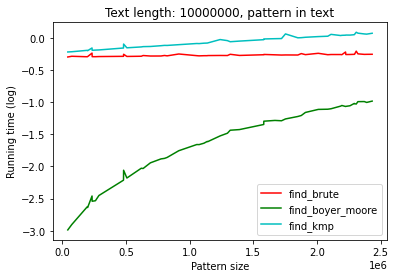

In [19]:
def line_color(A):
    if A == find_brute.__name__:
        return 'r'
    elif A == find_boyer_moore.__name__:
        return 'g'
    else:
        return 'c'

long_text = []
alphabet_case_bases = [96, 65]
text_len = 10 ** 7
for i in range(text_len):
    alphabet_case = random.sample(alphabet_case_bases, 1)[0]
    long_text.append(chr(random.randint(alphabet_case, alphabet_case + 25)))
long_text = ''.join(long_text)
algo_name_to_data = {}


fig, axes = plot.subplots()

# For pattern in text
for A in [find_brute, find_boyer_moore, find_kmp]:
    algo_name_to_data[A.__name__] = {}

for pattern_size in random.sample(range(1, text_len // 4), 50): 
    pattern_location = text_len - pattern_size - 1
    pattern = long_text[pattern_location: pattern_location + pattern_size]
    for A in [find_brute, find_boyer_moore, find_kmp]:
        runtime = get_runtime(A, long_text, pattern)
        algo_name_to_data[A.__name__][pattern_size] = math.log(runtime)

for A in [find_brute, find_boyer_moore, find_kmp]:
    algo_name_to_data[A.__name__] = {key : algo_name_to_data[A.__name__][key] for key in sorted(algo_name_to_data[A.__name__])}


for A in [find_brute, find_boyer_moore, find_kmp]:
    data = algo_name_to_data[A.__name__]
    axes.plot(list(data.keys()), list(data.values()), line_color(A.__name__), label= A.__name__)
    axes.set_xlabel('Pattern size')
    axes.set_ylabel('Running time (log)')
    axes.set_title(f"Text length: {text_len}, pattern in text")
    axes.legend()



# Problem 3: Matrix-chain Multiplication


In [26]:
#3.1 Brute Force
import sys

def optimal(s,i,j):
    if i == j:
        print(chr(64 + i), end = "")
        return

    else:
        print ("(", end = "")
    optimal(s,i,s[i][j])
    optimal(s,s[i][j]+1,j)
    print (")", end = "")

def MatrixChainOrder(p, i, j, s):

    if i == j:
        return 0

    m = sys.maxsize

    for k in range(i, j):

        count = (MatrixChainOrder(p, i, k,s)
        + MatrixChainOrder(p, k + 1, j,s)
        + p[i-1] * p[k] * p[j])

    if count < m:
        m = count
        s[i][j] = k

    return m

A = [30, 35, 15, 5, 10, 20, 25]
n = len(A)
s = [[0 for i in range(n)] for i in range(n)]
print("Minimum number of multiplications is ",
MatrixChainOrder(A, 1, n-1,s))
print("Optimal parenthesis is:")
optimal(s,1,n-1)

Minimum number of multiplications is  40500
Optimal parenthesis is:
(((((AB)C)D)E)F)

In [28]:
#3.2 Bottomup approach
import sys
import math

def optimal(s,i,j):
    if i == j:
        print(chr(64 + i), end = "")
        return


    else:
        print ("(", end = "")
        optimal(s,i,s[i][j])
        optimal(s,s[i][j]+1,j)
        print (")", end = "")

def matrix_chain_order(p):
    n = len(p)
    m = [[0 for i in range(n)] for i in range(n)]
    s = [[0 for i in range(n)] for i in range(n)]

    for i in range(1, n):
        m[i][i] = 0
    for l in range(2,n):
        for i in range(1,n-l+1):
            j = i + l - 1
            m[i][j] = sys.maxsize
            for k in range(i, j):
                q = m[i][k] + m[k+1][j] + p[i-1]*p[k]*p[j]
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j] = k

    return m, s


A = [30, 35, 15, 5, 10, 20, 25]
name = "A"
m,s = matrix_chain_order(A)
print("Minimum number of scalar multiplications to multiply the matrices is:", m[1][len(A)-1])
print("Optimal parenthesis is:")
optimal(s,1,len(A)-1)

Minimum number of scalar multiplications to multiply the matrices is: 15125
Optimal parenthesis is:
((A(BC))((DE)F))

In [29]:
# 3. Dynamic Programming with Memoization
import sys

id_x = 1


def next_match():
    global id_x
    id_x = id_x + 1


def print_parenthesis(i, j, n, order, count):
    global id_x
    count = id_x
    if i == j:
        print("D{}".format(count), end='')
        next_match()
        return

    print("(", end='')
    print_parenthesis(i, order[i][j], n, order, count)
    print_parenthesis(order[i][j] + 1, j, n, order, count)

    print(")", end='')


def matrix_chain_memoised(p, i, j, dp, order):
    if (i == j):
        return [0, order]

    if (dp[i][j] != -1):
        return [dp[i][j], order]

    dp[i][j] = sys.maxsize

    for k in range(i, j):
        val = (matrix_chain_memoised(p, i, k, dp, order)[0] + matrix_chain_memoised(p, k + 1, j, dp, order)[0] + p[
            i - 1] * p[k] * p[j])
        if val < dp[i][j]:
            dp[i][j] = val
            order[i][j] = k

    return [dp[i][j], order]


def matrix_chain_order(p, n):
    i = 1
    j = n - 1
    dp = [[-1 for i in range(n)] for j in range(n)]
    order = [[None for i in range(n)] for j in range(n)]
    return matrix_chain_memoised(p, i, j, dp, order)


# main Code
arr = [30, 35, 15, 5, 10, 20, 25]
n = len(arr)
val = matrix_chain_order(arr, n)
print("Minimum number of multiplications required is", val[0])
print("Optimal Parenthesis  is ", end="")
print_parenthesis(1, n - 1, n, val[1], 1)

Minimum number of multiplications required is 15125
Optimal Parenthesis  is ((D1(D2D3))((D4D5)D6))

# Problem 4: Longest Common Sub-sequence (LCS) Problem

In [5]:
def findlcs(text1 , text2):
    m = len(text1)
    n = len(text2)

    max_lcs_count = 0
    res = ''
    # create a table of (m+1) * (n+1) and initalize it with zero
    table = [[0 for j in range(n+1)] for i in range(m+1)]

    #for creating table if character are same take diagonal value
    #else take max of previous row or column
    for i in range(1, m+1):
        for j in range(1, n+1):
            if text1[i - 1] == text2[j - 1]:
                table[i][j] = 1 + table[i - 1][j - 1]
            else:
                if table[i - 1][j] > table[i][j - 1]:
                    table[i][j] = table[i - 1][j]
                else:
                    table[i][j] = table [i][j - 1]

    max_lcs_count = table[m][n]

    #now for returning the longest common subsequence we have to backtrack the table
    #and see where the value is coming from and see if the character are common at that index
    # and append that character in result and reverse of that result string is what we are looking for

    x = m
    y = n


    while x > 0 and y > 0:
        if text1[x - 1] == text2[y - 1]:
            res += text1[x-1]
            x -= 1
            y -= 1
        else:
            if table[x - 1][y] > table[x][y - 1]:
                x = x - 1
            else:
                y = y - 1

    return max_lcs_count, res[::-1]




if __name__ == "__main__":
    dna_string2 = "VTLARTDLEMQIEGLKEELAYLRKNHEEEMLALRGQTGGDVNVEMDAAPGVDLSRILNEMRDQYEQMAEKNRRDAETWFLSKTEELNKEVASNSELVQSSRSEVTELRRVLQGLEIELQSQLSTKASLENSLEETKGRYCMQLSQIQGLIGSVEEQLAQLRCEMEQQSQEYQILLDVKTRLEHEIATYRRLLXGEDAHLSSQQASGQSYSSREVFTSSSSSSSRQTRPILKEQSSSSFSQGQSS"
    dna_string1 = "MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF"
    max_length, lcs_string = findlcs(dna_string1, dna_string2)
    print(f"longest common sub-sequence of length {max_length} between dna string is {lcs_string}")

longest common sub-sequence of length 108 between dna string is DIALNMARGQGVVMDGDSRILNDMEKNRAELTELNKANEVQSSRSVTELRRLGEIELQSSSSLEKYLQIIGEELQLMESEIDVKLATLGGYRETSTIKESSSSFSQGS


In [ ]:
longest common sub-sequence is the sequece that occurs commonly in both the texts while traversing in forward diection 
the direction of the chracter to chracter arrow should not intersect.

# REPORT

1.
In the brute force approach of pattern matching we start from the first index of the pattern and match it with the first index of the text . if there is any mismatch we start from the second index of the text . so if the text is of size d and pattern of size p then we have time complexity of dp .As far as the space complexity goes we are only storing text and the pattern so whatever max size of the text or pattern.

For non overlapping pattern in text we follow the same approach except if the charcters are overlapping in the text then we will have to avoid that and again keep looking for the next sequence.The time complexity in this case will be dp as well.

In case of boyer more we start from end of the pattern and same index for the text as well and upon mismatch we find the occurance of the mismatch  element in the  the pattern and move that index corresponding to the text character and start the search again. Time complexity best case scenarion is O(d+p) and worst case O(d*p)
 
In case of KMP we create as table after creating all the suffic and prefixes of the pattern and matching the same . then . Then upon mismatch we use lookup table to see the index where we should move and start the seach again .
time complexity is - overall complexity is O(d+p) 


2
From the graph we can see the larger he text file more the time is taken . In case of boyer moore the it start from less and then increases where as for KMP and bruteforce the comparisions are high. and same can be seen in case of the running time as well . The performace wise booyer moore is performing better than brute force and KMP  algorithms for the tested values.



3...
In brute force approach we place parenthesis at all possible places, calculate the cost for each placement and return the minimum value.The time complexity is exponenetial as it is the recursive approach .
we avoid this by storing the previously calculated values using dynamic programming where recomputations of same subproblems can be avoided by constructing a temporary array m[][] in bottom up manner. Time complexity for this approach is O(n^3) and space complexity is O(n^2).
 


4..
we create a table of (m+1) * (n+1) and initalize it with zero.for creating table if character are same take diagonal value else take max of previous row or column. now for returning the longest common subsequence we have to backtrack the table and see where the value is coming from and see if the character are common at that index and append that character in result and reverse of that result string is what we are looking for. Time complexity is O(m*n)

